## Codes for visualization of KoNER (CONFUSION MATRIX)

In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix

In [25]:
#y_ture and y_pred are the list of labels, and the labels are a distinct label list
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True,
                          outname="./confusionMatirx.pdf"):
    """
    given a sklearn confusion matrix (cm), make a Nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    plt.figure(figsize=(15, 15))
    
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=60 ,fontsize=20)
        plt.yticks(tick_marks, target_names ,fontsize=20)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
            
    #plt.colorbar()
    plt.tight_layout()
    #plt.title('Accuracy={:0.4f}; Misclass={:0.4f}'.format(accuracy, misclass), fontsize=20)
    #plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    plt.savefig(os.path.join(outname), dpi=300, format='pdf', bbox_inches='tight')
    plt.show()

In [26]:
y_pred = []
y_true = []
labels = ['org_i\n', 'evt_i\n', 'plt_b\n', 'num_b\n', 'loc_i\n', 'mat_i\n', 'org_b\n', 'trm_b\n', 'tim_b\n', 'num_i\n', 'tim_i\n', 'fld_i\n', 'o\n', 'trm_i\n', 'anm_b\n', 'evt_b\n', 'cvl_b\n', 'afw_b\n', 'loc_b\n', 'dat_b\n', 'fld_b\n', 'per_b\n', 'anm_i\n', 'cvl_i\n', 'afw_i\n', 'mat_b\n', 'plt_i\n', 'per_i\n', 'dat_i\n']
#with open("./results/upos_predicted_0.8762261655461259_0.8764837749439565") as pred:
#with open("./results/xpos_predicted_0.8731381518755719_0.8767961486163683") as pred:
with open("./results/xpos_bert_predicted_0.8659930028286438_0.8569192523708682") as pred:
    tag = pred.readlines()[0:-1]
    y_pred.extend(tag)
    
#with open("./results/upos_gold_0.8762261655461259_0.8764837749439565") as gold:
#with open("./results/xpos_gold_0.8731381518755719_0.8767961486163683") as gold:
with open("./results/xpos_bert_gold_0.8659930028286438_0.8569192523708682") as gold:
    tag = gold.readlines()[0:-1]
    y_true.extend(tag)
'''
keys = set(y_true)
labels = list(keys)
keyToi = {label: i  for i, label in enumerate(labels)}
pred = [ keyToi[pred] for pred in y_pred ]
true = [ keyToi[true] for true in y_true ]
'''    

'\nkeys = set(y_true)\nlabels = list(keys)\nkeyToi = {label: i  for i, label in enumerate(labels)}\npred = [ keyToi[pred] for pred in y_pred ]\ntrue = [ keyToi[true] for true in y_true ]\n'

In [27]:
cm = confusion_matrix(y_true, y_pred, labels=labels)

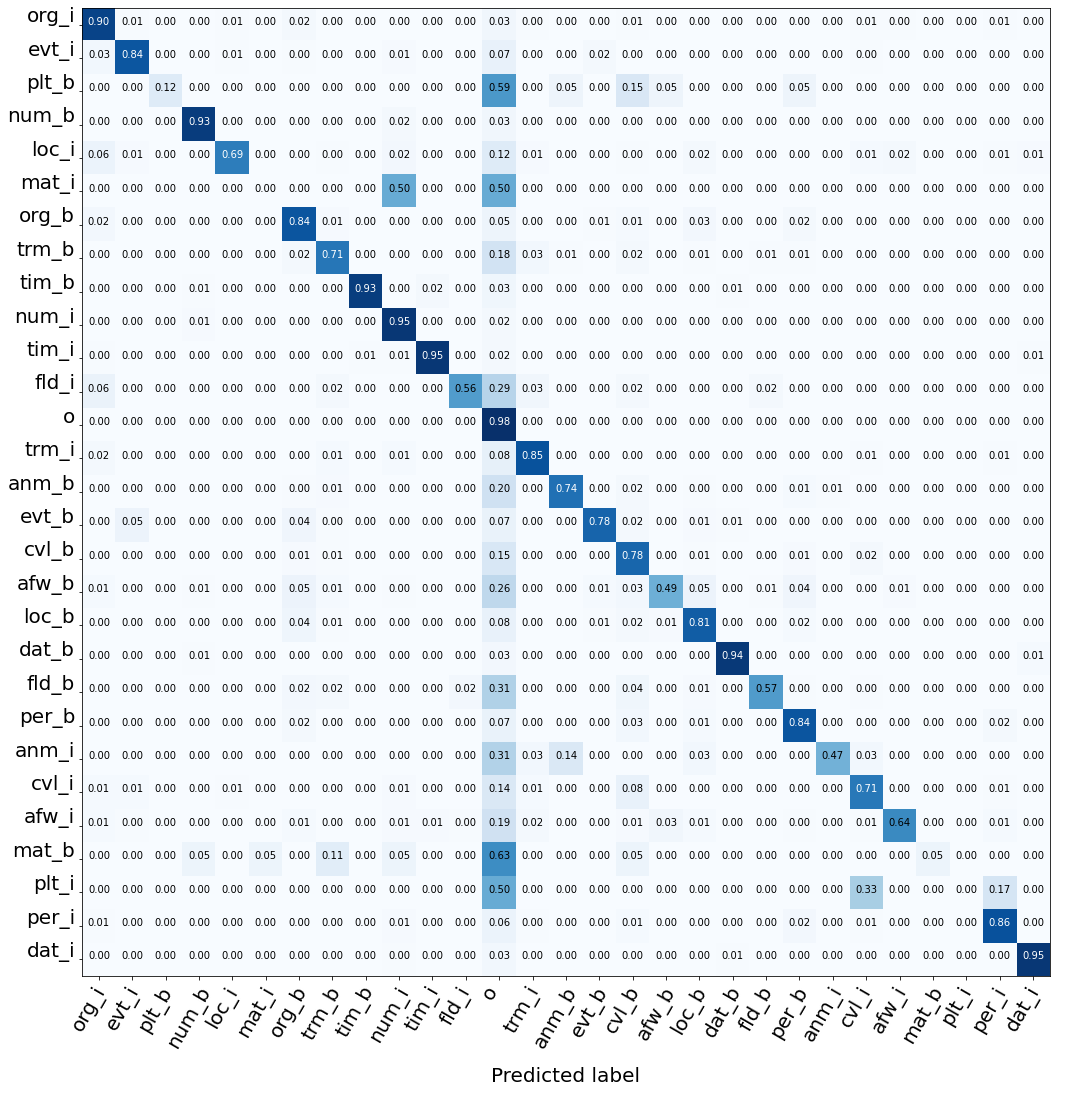

In [28]:
plot_confusion_matrix(cm,labels, normalize=True, outname="./xpos_bert.pdf")

In [4]:
y_pred = []
y_actu = []
with open("./results/xpos_predicted_0.8731381518755719_0.8767961486163683") as pred:
    tag = pred.readlines()[0:-1]
    y_pred.extend(tag)
    
with open("./results/xpos_gold_0.8731381518755719_0.8767961486163683") as gold:
    tag = gold.readlines()[0:-1]
    y_actu.extend(tag)

y_actu = pd.Series(y_actu, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)

In [5]:
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['True Label'], colnames=['Predicted Label'], margins=True)

In [6]:
df_confusion.shape
df_confusion

Predicted Label,afw_b\n,afw_i\n,anm_b\n,anm_i\n,cvl_b\n,cvl_i\n,dat_b\n,dat_i\n,evt_b\n,evt_i\n,...,org_b\n,org_i\n,per_b\n,per_i\n,plt_b\n,tim_b\n,tim_i\n,trm_b\n,trm_i\n,All
True Label,,,,,,,,,,,,,,,,,,,,,
afw_b\n,219,9,1,0,6,0,2,0,1,1,...,22,5,13,0,0,0,0,14,0,406
afw_i\n,15,334,1,0,3,8,1,1,0,0,...,4,8,2,14,0,0,0,1,23,495
anm_b\n,0,0,503,5,10,2,0,0,0,0,...,2,0,4,0,1,0,0,4,1,636
anm_i\n,0,0,6,19,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,36
cvl_b\n,4,3,29,0,4773,143,3,0,9,3,...,40,15,94,36,0,0,0,35,4,5875
cvl_i\n,0,8,0,2,133,1499,0,7,2,23,...,1,17,5,25,0,0,0,0,14,1979
dat_b\n,0,1,1,0,0,0,2505,37,2,2,...,1,0,2,0,0,2,0,2,0,2639
dat_i\n,0,1,0,0,1,0,15,3499,7,2,...,0,1,1,1,0,1,4,0,0,3651
evt_b\n,1,0,0,0,11,0,5,3,903,70,...,25,0,3,0,0,0,0,2,0,1093


In [ ]:
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
df_conf_norm

In [ ]:
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
#plt.figure(figsize=(9, 8))
df_confusion = df_conf_norm
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.get_cmap('Blues'), include_values=True):#plt.cm.gray_r):
    fig = plt.figure(figsize=(12, 12))
    #ax = plt.gca()
    #im = ax.imshow(df_confusion, cmap=cmap)
    plt.imshow(df_confusion, cmap=cmap)
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=60, fontsize=15)
    plt.yticks(tick_marks, df_confusion.index, fontsize=15)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name, fontsize=20)
    plt.xlabel(df_confusion.columns.name, fontsize=20)
    plt.colorbar()

plot_confusion_matrix(df_confusion)

plt.savefig(os.path.join("./",'xpos_xmlroberta_result.pdf'), dpi=300, format='pdf')
plt.show()
